In [1]:
%config IPCompleter.greedy=True

import pandas as pd
import matplotlib.pyplot as plt

In [62]:
import file_selector as selector

file_path = selector.gui_fname('../apiTester/logs/').decode("utf-8")
file_path

'D:/Wichtig/Studium/Studienarbeit/Projects/apiTester/logs/2021-04-30_10-59-18.csv'

In [63]:
df = pd.read_csv(file_path, ';')
df.head()

,timestamp,status code,request time,server time,request type,function type,Unnamed: 6
0,1619780358277,200,1111,63.000000,get,/default/fib_node,NaN
1,1619780358279,200,1163,162.000000,get,/default/fib_node,NaN
2,1619780358278,200,1171,164.000000,get,/default/fib_node,NaN
3,1619780358281,200,1519,571.211459,get,/default/fib_python,NaN
4,1619780358280,200,1525,566.245233,get,/default/fib_python,NaN


#### parse timestamps to time since start

In [64]:
start_time = df['timestamp'][0]
start_time
   
df['timestamp'] = df['timestamp'].apply(lambda x: (x - start_time) / 1000)

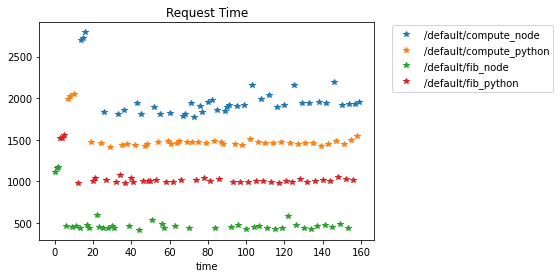

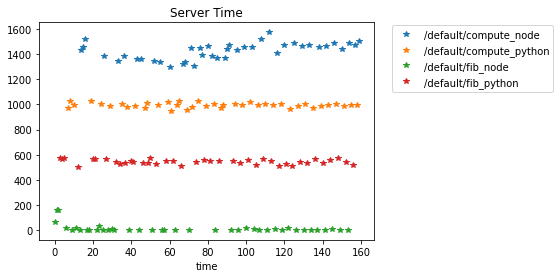

In [68]:
legend_offset = 1.55

df.groupby('function type')['request time'].plot(style='*', legend=True, figure=plt.figure(),
                                                 xlabel='time', title='Request Time')
plt.legend(bbox_to_anchor=(legend_offset, 1.01), loc='upper right')
plt.show()

df.groupby('function type')['server time'].plot(style='*', legend=True, figure=plt.figure(),
                                                xlabel='time', title='Server Time')
plt.legend(bbox_to_anchor=(legend_offset, 1.01), loc='upper right')
plt.show()


# Cloudwatch

In [44]:
file_path = 'cloudwatch/cloudwatch.csv'
df_cloudwatch = pd.read_csv(file_path, ',')
df_cloudwatch.head()

,Timestamp,log,DurationInMS,BilledDurationInMS,MemorySetInMB,MemoryUsedInMB
0,2021-04-30 11:03:09.243,257307065737:/aws/lambda/compute_node,1521.15,1522,128,88
1,2021-04-30 11:02:58.890,257307065737:/aws/lambda/compute_python,1017.28,1018,128,51
2,2021-04-30 11:02:57.283,257307065737:/aws/lambda/compute_node,1491.58,1492,128,88
3,2021-04-30 11:02:49.676,257307065737:/aws/lambda/fib_python,576.06,577,128,50
4,2021-04-30 11:02:47.330,257307065737:/aws/lambda/compute_python,1035.14,1036,128,51


In [45]:
# truncate log
df_cloudwatch['log'] = df_cloudwatch['log'].apply(lambda x: x.split('/')[-1])
df_cloudwatch.head()

,Timestamp,log,DurationInMS,BilledDurationInMS,MemorySetInMB,MemoryUsedInMB
0,2021-04-30 11:03:09.243,compute_node,1521.15,1522,128,88
1,2021-04-30 11:02:58.890,compute_python,1017.28,1018,128,51
2,2021-04-30 11:02:57.283,compute_node,1491.58,1492,128,88
3,2021-04-30 11:02:49.676,fib_python,576.06,577,128,50
4,2021-04-30 11:02:47.330,compute_python,1035.14,1036,128,51


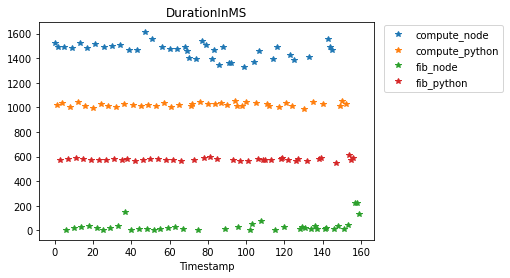

In [58]:
df_cloudwatch.groupby('log')['DurationInMS'].plot(style='*', legend=True, figure=plt.figure(),
                                                 xlabel='Timestamp', title='DurationInMS')
plt.legend(bbox_to_anchor=(1.4, 1.01), loc='upper right')
plt.show()

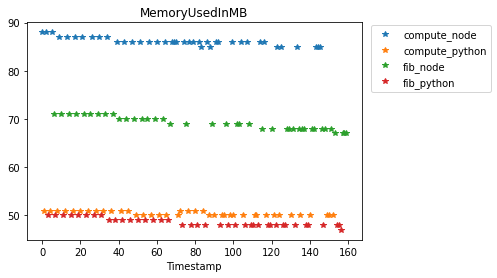

In [59]:
df_cloudwatch.groupby('log')['MemoryUsedInMB'].plot(style='*', legend=True, figure=plt.figure(),
                                                 xlabel='Timestamp', title='MemoryUsedInMB')
plt.legend(bbox_to_anchor=(1.4, 1.01), loc='upper right')
plt.show()